# Traveling UAV

In [1]:
from settings.environment import Environment
from roadmap.visibility_roadmap import VisibilityRoadmap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from shapely.geometry import Point

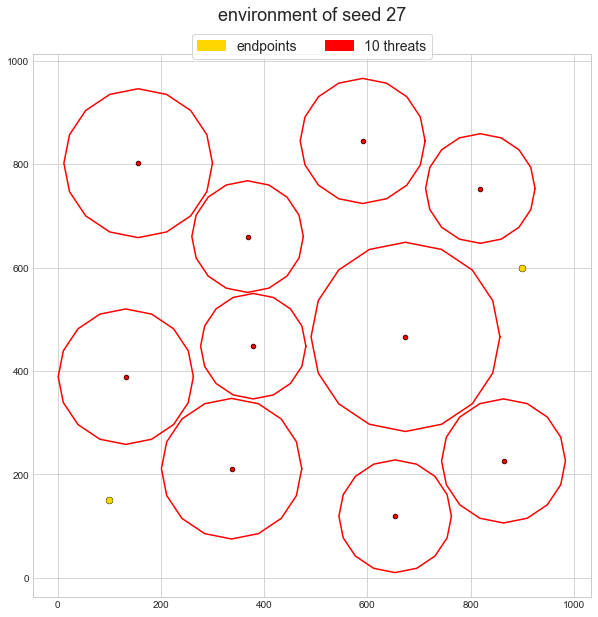

In [6]:
env = Environment(source=Point(100,150), target=Point(900,600), num_threats=10, seed_value=27)
env.plot()
plt.title(f'environment of seed {env._seed_value}', fontsize=18, y=1.05)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True)

plt.savefig(f'../plots/environment_of_seed_{env._seed_value}.png')
plt.show()

In [7]:
rm = VisibilityRoadmap(env)
shortest_path, shortest_length, shortest_risk = rm.shortest_path(weight='length')
safest_path, safest_length, safest_risk = rm.shortest_path(weight='risk')

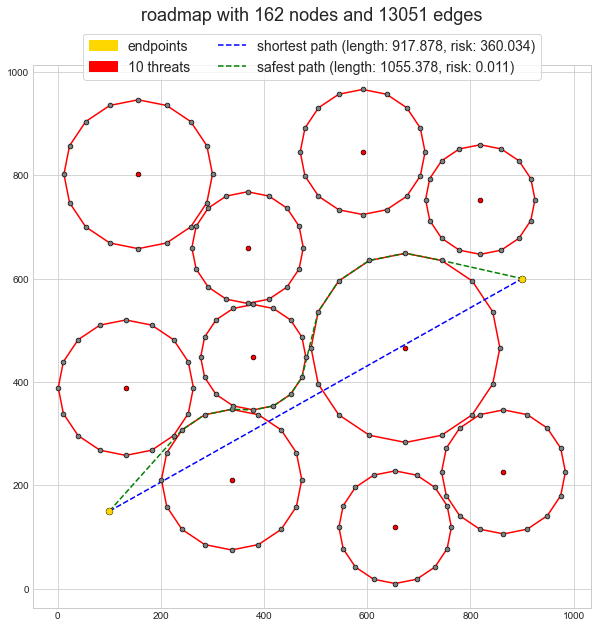

In [8]:
rm.plot(display_edges=False)
plt.plot([p[0] for p in shortest_path], [p[1] for p in shortest_path], color='blue', linestyle='dashed')
plt.plot([p[0] for p in safest_path], [p[1] for p in safest_path], color='green', linestyle='dashed')

plt.title(f'roadmap with {len(rm._graph.nodes)} nodes and {len(rm._graph.edges)} edges', fontsize=18, y=1.07)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats'),
                    Line2D([0], [0], color='blue', linestyle='dashed',
                           label=f'shortest path (length: {round(shortest_length, 3)}, risk: {round(shortest_risk, 3)})'),
                    Line2D([0], [0], color='green', linestyle='dashed',
                           label=f'safest path (length: {round(safest_length, 3)}, risk: {round(safest_risk, 3)})')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2, fancybox=True)

plt.savefig('../plots/shortest_and_safest_path_examples.png')
plt.show()